<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling_NLP/blob/main/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Modules Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import urllib.request

import numpy as np
import pandas as pd
from string import punctuation

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, Bidirectional, GRU, LSTM, TimeDistributed
from tensorflow.keras.utils import plot_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Recurrent Neural Network(RNN), 순환 신경망**

## **Keras를 통한 RNN 구현**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________



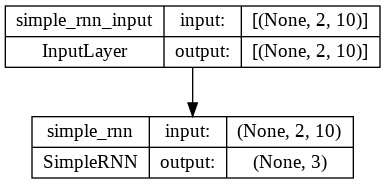

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(3, input_shape=(2, 10)))

rnn_model.summary()
print()
plot_model(rnn_model, show_shapes=True, show_dtype=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________



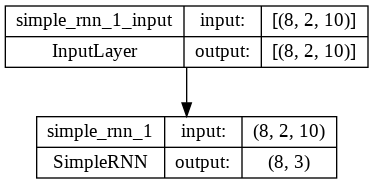

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10)))

rnn_model.summary()
print()
plot_model(rnn_model, show_shapes=True, show_dtype=False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________



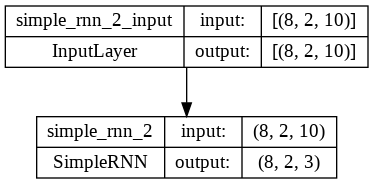

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10), return_sequences=True))

rnn_model.summary()
print()
plot_model(rnn_model, show_shapes=True, show_dtype=False)

## **Python을 활용한 RNN 구현**

In [ ]:
timesteps = 10          # 시점의 수, NLP에서는 보통 문장의 길이
input_dim = 4           # 입력의 차원, NLP에서는 보통 단어 벡터의 차원
hidden_units = 8        # 은닉 상태의 크기, 메모리 셀의 용량

inputs = np.random.random((timesteps, input_dim))   # 입력에 해당되는 2D 텐서
hidden_state_t = np.zeros((hidden_units,))          # 초기 은닉 상태는 0(벡터)로 초기화

print('Initial Hidden State =', hidden_state_t)
print()

Wx = np.random.random((hidden_units, input_dim))       # (8, 4)크기의 2D 텐서 생성, 입력에 대한 가중치
Wh = np.random.random((hidden_units, hidden_units))    # (8, 8)크기의 2D 텐서 생성, 은닉 상태에 대한 가중치
b = np.random.random((hidden_units,))                  # (8,)크기의 1D 텐서 생성, 이 값은 편향치(bias)

print('가중치 Wx의 크기(shape) :', np.shape(Wx))
print('가중치 Wh의 크기(shape) :', np.shape(Wh))
print('편향의 크기(shape) :', np.shape(b))
print()

total_hidden_states = []


for input_t in inputs:          # 각 시점 별 입력값.
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)  # Wx * Xt + Wh * Ht-1 + b(bias)

    total_hidden_states.append(list(output_t))      # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
    hidden_state_t = output_t                       # 각 시점의 은닉 상태의 값을 계속해서 누적

#print('type of total_hidden_states:', type(total_hidden_states))       # for test
#print(total_hidden_states)                                             # for test

total_hidden_states = np.stack(total_hidden_states, axis = 0)           # 출력 시 값을 깔끔하게 해주는 용도, np.stack()에 관해서는 https://everyday-image-processing.tistory.com/87 참조

print('모든 시점의 은닉 상태 :')
print(total_hidden_states)
#print('type of total_hidden_states:', type(total_hidden_states))        # for test

Initial Hidden State = [0. 0. 0. 0. 0. 0. 0. 0.]

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)

모든 시점의 은닉 상태 :
[[0.46116698 0.8390555  0.78178389 0.64525332 0.86123346 0.86511488
  0.82967974 0.91908172]
 [0.99978202 0.99995899 0.99904609 0.99881698 0.99964027 0.99959898
  0.99969864 0.99998179]
 [0.99998782 0.99999775 0.9998649  0.99958936 0.9999737  0.99994699
  0.9999739  0.99999875]
 [0.99996884 0.9999952  0.99964187 0.99947634 0.99994161 0.99991429
  0.99995467 0.9999983 ]
 [0.99990503 0.99998948 0.99845373 0.99904269 0.99989849 0.99977719
  0.99986485 0.99999257]
 [0.99977814 0.99996462 0.99789834 0.99895875 0.99986221 0.99962122
  0.99986924 0.99999196]
 [0.99956759 0.99993227 0.99508882 0.99829108 0.99974447 0.99928042
  0.99980618 0.99998635]
 [0.99996606 0.9999946  0.99962718 0.99945325 0.99995433 0.99989913
  0.99994822 0.99999737]
 [0.99978329 0.99995975 0.99694216 0.99804921 0.99977248 0.99941066
  0.9998813  0.99999094]
 [0.99996721 0.9999957

## **Deep Recurrent Neural Network(DRNN), 깊은 순환 신경망**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10, 8)             112       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 10, 8)             136       
                                                                 
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________



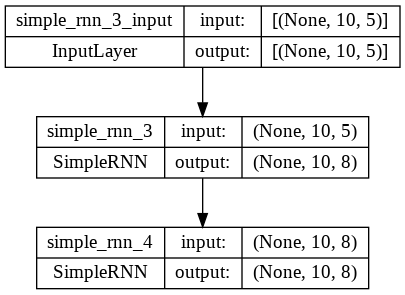

In [ ]:
deep_rnn = Sequential()
deep_rnn.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences = True))
deep_rnn.add(SimpleRNN(hidden_units, return_sequences=True))

deep_rnn.summary()
print()
plot_model(deep_rnn, show_shapes=True)

## **(Deep) Bidirectional Recurrent Neural Network(BRNN), 양방향 순환 신경망**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 10, 16)           224       
 l)                                                              
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________



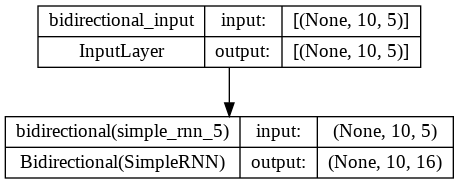

In [ ]:
timesteps = 10
input_dim = 5

bi_rnn = Sequential()
bi_rnn.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))

bi_rnn.summary()
print()
plot_model(bi_rnn, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 10, 16)           224       
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 10, 16)           400       
 nal)                                                            
                                                                 
Total params: 1,424
Trainable params: 1,424
Non-traina

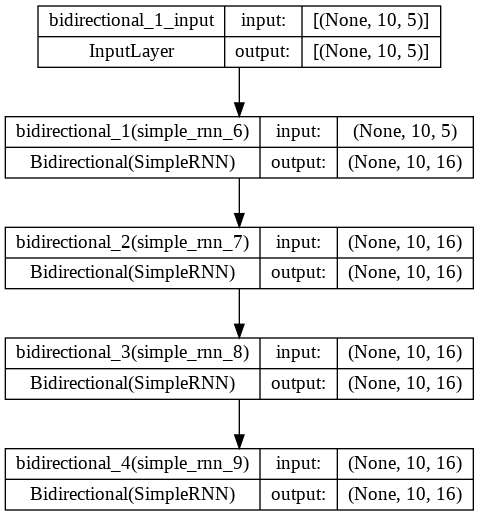

In [ ]:
timesteps = 10
input_dim = 5

bi_rnn = Sequential()
bi_rnn.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
bi_rnn.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
bi_rnn.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
bi_rnn.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))

bi_rnn.summary()
print()
plot_model(bi_rnn, show_shapes=True)

# **RNN and Long-Short Term Memory(LSTM), 순환신경망과 장단기 메모리**

## **SimpleRNN and LSTM**

In [ ]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]      # 4개의 timesteps, 매 timestep마다 5차원의 word vector 입력
train_X = np.array([train_X], dtype=np.float32)     # Numpy를 통한 3D tensor화

rnn1 = SimpleRNN(3)
hidden_state1 = rnn1(train_X)
print('hidden state1 : {}, shape: {}'.format(hidden_state1, hidden_state1.shape))       # 마지막 시점의 hidden sate만 출력
print()

rnn2 = SimpleRNN(3, return_sequences=True)
hidden_state2 = rnn2(train_X)
print('hidden state2 : {}, shape: {}'.format(hidden_state2, hidden_state2.shape))       # 모든 시점의 hidden state 출력
print()

rnn3 = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_state3, last_state3 = rnn3(train_X)
print('hidden state3 : {}, shape: {}'.format(hidden_state3, hidden_state3.shape))       # 모든 시점의 hidden state 출력
print('last hidden state : {}, shape: {}'.format(last_state3, last_state3.shape))       # 마지막 시점의 hidden state 출력
print()

rnn4 = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state4, last_state4 = rnn4(train_X)
print('hidden state4 : {}, shape: {}'.format(hidden_state4, hidden_state4.shape))       # 마지막 시점의 hidden state 출력
print('last hidden state : {}, shape: {}'.format(last_state4, last_state4.shape))       # 마지막 시점의 hidden state 출력

hidden state1 : [[-0.81454384 -0.5658176   0.93067414]], shape: (1, 3)

hidden state2 : [[[-0.35699072  0.83827126  0.02213533]
  [ 0.2594147  -0.46080318  0.858985  ]
  [ 0.8389665   0.87660056 -0.8459163 ]
  [ 0.18429543  0.16500093  0.6423271 ]]], shape: (1, 4, 3)

hidden state3 : [[[-0.99671435 -0.99729246  0.98024213]
  [-0.47709826 -0.9996585   0.24096745]
  [-0.92834985 -0.9783693   0.70496124]
  [-0.46274137 -0.9869648   0.95605993]]], shape: (1, 4, 3)
last hidden state : [[-0.46274137 -0.9869648   0.95605993]], shape: (1, 3)

hidden state4 : [[-0.62825686 -0.41005316 -0.9963259 ]], shape: (1, 3)
last hidden state : [[-0.62825686 -0.41005316 -0.9963259 ]], shape: (1, 3)



In [ ]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]      # 4개의 timesteps, 매 timestep마다 5차원의 word vector 입력
train_X = np.array([train_X], dtype=np.float32)     # Numpy를 통한 3D tensor화

lstm1 = LSTM(3, return_sequences=False, return_state=True)
hidden_state1, last_state1, last_cell_state1 = lstm1(train_X)
print('hidden state1 : {}, shape: {}'.format(hidden_state1, hidden_state1.shape))               # 마지막 시점의 hidden state
print('last hidden state1 : {}, shape: {}'.format(last_state1, last_state1.shape))              # 마지막 시점의 hidden state
print('last cell state1 : {}, shape: {}'.format(last_cell_state1, last_cell_state1.shape))      # 마지막 시점의 cell state
print()

lstm2 = LSTM(3, return_sequences=True, return_state=True)
hidden_state2, last_state2, last_cell_state2 = lstm2(train_X)
print('hidden state2 : {}, shape: {}'.format(hidden_state2, hidden_state2.shape))               # 모든 시점의 hidden state
print('last hidden state2 : {}, shape: {}'.format(last_state2, last_state2.shape))              # 마지막 시점의 hidden state
print('last cell state2 : {}, shape: {}'.format(last_cell_state2, last_cell_state2.shape))      # 마지막 시점의 cell state
print()

lstm3 = LSTM(3, return_sequences=False, return_state=False)
hidden_state3 = lstm3(train_X)
print('hidden state3 : {}, shape: {}'.format(hidden_state3, hidden_state3.shape))               # 마지막 시점의 hidden state
print()

lstm4 = LSTM(3, return_sequences=True, return_state=False)
hidden_state4 = lstm4(train_X)
print('hidden state4 : {}, shape: {}'.format(hidden_state4, hidden_state4.shape))               # 모든 시점의 hidden state

hidden state1 : [[-0.04056311  0.02142706  0.48492944]], shape: (1, 3)
last hidden state1 : [[-0.04056311  0.02142706  0.48492944]], shape: (1, 3)
last cell state1 : [[-0.15148115  0.02929875  1.1898588 ]], shape: (1, 3)

hidden state2 : [[[-0.11812145  0.4852752   0.16492945]
  [-0.2237871   0.6032207   0.04330363]
  [-0.40782043  0.35763988 -0.07796808]
  [-0.3413331   0.14840524 -0.20219065]]], shape: (1, 4, 3)
last hidden state2 : [[-0.3413331   0.14840524 -0.20219065]], shape: (1, 3)
last cell state2 : [[-0.73992395  0.19212039 -0.4847226 ]], shape: (1, 3)

hidden state3 : [[-0.257144    0.35061654  0.10335623]], shape: (1, 3)

hidden state4 : [[[-0.12020026 -0.07055715  0.02230837]
  [-0.23807807  0.12454587  0.23692931]
  [-0.12825365  0.01084555  0.31256106]
  [-0.20051628 -0.15826797  0.20215774]]], shape: (1, 4, 3)



## **Bi-Directional LSTM, BiLSTM**

In [ ]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]      # 4개의 timesteps, 매 timestep마다 5차원의 word vector 입력
train_X = np.array([train_X], dtype=np.float32)     # Numpy를 통한 3D tensor화

k_init = tf.keras.initializers.Constant(value=0.1)      # hidden state값 변화를 측정하기 위해 hidden state value 고정
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

bilstm1 = Bidirectional(LSTM(3, return_sequences=False, return_state=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states1, forward_h1, forward_c1, backward_h1, backward_c1 = bilstm1(train_X)
print('hidden states1 : {}, shape: {}'.format(hidden_states1, hidden_states1.shape))        # 순방향의 last hidden state + 역방향의 first hidden state 연결되어 출력
print('forward hidden state1 : {}, shape: {}'.format(forward_h1, forward_h1.shape))
print('forward cell state1 : {}, shape: {}'.format(forward_c1, forward_c1.shape))
print('backward hidden state1 : {}, shape: {}'.format(backward_h1, backward_h1.shape))
print('backward cell state1 : {}, shape: {}'.format(backward_c1, backward_c1.shape))
print()

bilstm2 = Bidirectional(LSTM(3, return_sequences=True, return_state=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states2, forward_h2, forward_c2, backward_h2, backward_c2 = bilstm2(train_X)
print('hidden states2 : {}, shape: {}'.format(hidden_states2, hidden_states2.shape))        # 순방향의 first hidden state + 역방향의 first hidden state 연결되어 출력
print('forward hidden state2 : {}, shape: {}'.format(forward_h2, forward_h2.shape))
print('forward cell state2 : {}, shape: {}'.format(forward_c2, forward_c2.shape))
print('backward hidden state2 : {}, shape: {}'.format(backward_h2, backward_h2.shape))
print('backward cell state2 : {}, shape: {}'.format(backward_c2, backward_c2.shape))

hidden states1 : [[0.6303139  0.6303139  0.6303139  0.70387346 0.70387346 0.70387346]], shape: (1, 6)
forward hidden state1 : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
forward cell state1 : [[1.5707086 1.5707086 1.5707086]], shape: (1, 3)
backward hidden state1 : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)
backward cell state1 : [[1.6402446 1.6402446 1.6402446]], shape: (1, 3)

hidden states2 : [[[0.35906476 0.35906476 0.35906476 0.70387346 0.70387346 0.70387346]
  [0.5511133  0.5511133  0.5511133  0.5886358  0.5886358  0.5886358 ]
  [0.5911575  0.5911575  0.5911575  0.39516988 0.39516988 0.39516988]
  [0.6303139  0.6303139  0.6303139  0.2194224  0.2194224  0.2194224 ]]], shape: (1, 4, 6)
forward hidden state2 : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
forward cell state2 : [[1.5707086 1.5707086 1.5707086]], shape: (1, 3)
backward hidden state2 : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)
backward cell state2 : [[1.6402446 1.6402446 1.6402446]], shape: (

# **Text Generation by RNN and LSTM**

## **Text Generation by RNN**

| samples | X | y |
|---|-------|---|
| 1 | 경마장에 |있는|
| 2 | 경마장에 있는| 말이 |
| 3 | 경마장에 있는 말이 | 뛰고 |
| 4 | 경마장에 있는 말이 뛰고 | 있다 |
| 5 |	그의 |	말이 |
| 6 |	그의 말이	| 법이다 |
| 7 |	가는 |	말이 |
| 8 |	가는 말이	| 고와야 |
| 9 |	가는 말이 고와야	| 오는 |
| 10 | 가는 말이 고와야 오는 |	말이 |
| 11 | 가는 말이 고와야 오는 말이 |	곱다 |

- '경마장에 있는 말이 뛰고 있다'
- '그의 말이 법이다'
- '가는 말이 고와야 오는 말이 곱다'  
세 가지 문장이 있다고 할 때, 모델이 문맥을 학습할 수 있도록 **전체 문장의 앞의 단어들을 전부 고려하여 학습하도록 데이터를 재구성**한다면 위와 같이 총 11개의 샘플이 구성됨

In [ ]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

tokenizer = Tokenizer()                         # 단어 집합 생성, Keras의 Tokenizer의 정수 인코딩은 index=1부터 시작이므로 padding을 위해 길이 +1
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print("단어 집합의 크기 =", vocab_size)
print(tokenizer.word_index)
print()

sequences = list()
for line in text.split("\n"):
    encoded = tokenizer.texts_to_sequences([line])[0]
    print("tokenizer.texts_to_sequences([{}]) =".format(line), tokenizer.texts_to_sequences([line]))
    print("encoded =", encoded)

    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print("Training sample size = %d" % len(sequences))
print("All sequences =", sequences)
print()

max_len = max(len(l) for l in sequences)                                            # 모든 training sample들 중 길이가 가장 긴 것으로 선택
sequences = pad_sequences(sequences, maxlen=max_len, padding="pre")                 # padding 처리하여 모든 sample의 길이를 max_len으로 일정하게 처리
print(sequences)
print()

sequences = np.array(sequences)             # Input과 Target으로 분리
X = sequences[:, :-1]
y = sequences[:, -1]
print("Training Input =", X)
print("Training Target =", y)
print()

y = to_categorical(y)                       # One-Hot Encoding
print(y)

단어 집합의 크기 = 12
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}

tokenizer.texts_to_sequences([경마장에 있는 말이 뛰고 있다]) = [[2, 3, 1, 4, 5]]
encoded = [2, 3, 1, 4, 5]
tokenizer.texts_to_sequences([]) = [[]]
encoded = []
tokenizer.texts_to_sequences([그의 말이 법이다]) = [[6, 1, 7]]
encoded = [6, 1, 7]
tokenizer.texts_to_sequences([]) = [[]]
encoded = []
tokenizer.texts_to_sequences([가는 말이 고와야 오는 말이 곱다]) = [[8, 1, 9, 10, 1, 11]]
encoded = [8, 1, 9, 10, 1, 11]
tokenizer.texts_to_sequences([]) = [[]]
encoded = []
Training sample size = 11
All sequences = [[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]

Training Input = [[ 0

In [ ]:
embedding_dim = 10          # 문장 생성하는 모델 설계 with RNN, 하이퍼 파라미터 정의
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation="softmax"))

model.summary()
print()
plot_model(model, show_shapes=True, show_dtype=False)
print()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=200, verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 10)          120       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                1376      
                                                                 
 dense_4 (Dense)             (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________

Epoch 1/200
1/1 - 1s - loss: 2.4881 - accuracy: 0.0000e+00 - 837ms/epoch - 837ms/step
Epoch 2/200
1/1 - 0s - loss: 2.4758 - accuracy: 0.0909 - 17ms/epoch - 17ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4633 - accuracy: 0.2727 - 12ms/epoch - 12ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4506 - accuracy: 0.2727 - 12ms/epoch -

In [ ]:
def sentence_generation(model, tokenizer, init_word, n):                    # 모델 디버깅을 위한 문장 생성 함수, arg = 모델, 토크나이저, 시작 단어, 반복 횟수
    current_word = init_word
    sentence = ""

    for _ in range(n):
        print("Current Word = {}".format(current_word))                     # 현재 확인중인 단어 시퀀스 확인
        encoded = tokenizer.texts_to_sequences([current_word])[0]           # 현재 확인중인 단어 시퀀스 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding="pre")         # 최대 길이 5에 맞춰 pre-padding

        result = model.predict(encoded, verbose=0)                          # 추론 진행
        result = np.argmax(result, axis=1)                                  # 가장 확률이 높은 단어 선택

        for word, index in tokenizer.word_index.items():                    # 사전에 정의한 word_index의 index에 대해
            if index == result:                                             # 추론 결과와 일치하면 stop
                break
        
        current_word = current_word + " " + word                            # 일치하는 단어를 현재 확인중이었던 단어 시퀀스에 추가
        print("Next Current Word = {}".format(current_word))

        sentence = sentence + " " + word                                    # 일치하는 단어를 문장에 추가
        print("Sentence = {}".format(sentence))
    
    sentence = init_word + sentence                                         # 전반적인 추론 결과 문장 return
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, '경마장에', 4))
print()
print()

print(sentence_generation(model, tokenizer, '그의', 2))
print()
print()

print(sentence_generation(model, tokenizer, '가는', 5))

Current Word = 경마장에
Next Current Word = 경마장에 있는
Sentence =  있는
Current Word = 경마장에 있는
Next Current Word = 경마장에 있는 말이
Sentence =  있는 말이
Current Word = 경마장에 있는 말이
Next Current Word = 경마장에 있는 말이 뛰고
Sentence =  있는 말이 뛰고
Current Word = 경마장에 있는 말이 뛰고
Next Current Word = 경마장에 있는 말이 뛰고 있다
Sentence =  있는 말이 뛰고 있다
경마장에 있는 말이 뛰고 있다


Current Word = 그의
Next Current Word = 그의 말이
Sentence =  말이
Current Word = 그의 말이
Next Current Word = 그의 말이 법이다
Sentence =  말이 법이다
그의 말이 법이다


Current Word = 가는
Next Current Word = 가는 말이
Sentence =  말이
Current Word = 가는 말이
Next Current Word = 가는 말이 고와야
Sentence =  말이 고와야
Current Word = 가는 말이 고와야
Next Current Word = 가는 말이 고와야 오는
Sentence =  말이 고와야 오는
Current Word = 가는 말이 고와야 오는
Next Current Word = 가는 말이 고와야 오는 말이
Sentence =  말이 고와야 오는 말이
Current Word = 가는 말이 고와야 오는 말이
Next Current Word = 가는 말이 고와야 오는 말이 곱다
Sentence =  말이 고와야 오는 말이 곱다
가는 말이 고와야 오는 말이 곱다


## **Text Generation by LSTM**

NewYork Times 기사의 제목 Dataset과 LSTM을 활용한 텍스트 생성 모델 설계

In [ ]:
file_path = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "CAU AI Class", "data")

df = pd.read_csv(os.path.join(file_path, "ArticlesApril2018.csv"))
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [ ]:
print("Column length =", len(df.columns))
print("Columns =", df.columns)
print(df["headline"].isnull().values.any())
print()

headline = []
headline.extend(list(df.headline.values))
print("상위 5개 headline =", headline[:5])
print()

print("Total Dataset Size =", len(headline))
headline = [word for word in headline if word != "Unknown"]
print("Denoised Total Dataset Size =", len(headline))
print(headline[:5])

Column length = 15
Columns = Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')
False

상위 5개 headline = ['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell', 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.', 'The New Noma, Explained', 'Unknown', 'Unknown']

Total Dataset Size = 1324
Denoised Total Dataset Size = 1214
['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell', 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.', 'The New Noma, Explained', 'How a Bag of Texas Dirt  Became a Times Tradition', 'Is School a Place for Self-Expression?']


In [ ]:
def preproc(raw_sentence):
    preproc_sentence = raw_sentence.encode("utf8").decode("ascii", "ignore")
    return "".join(word for word in preproc_sentence if word not in punctuation).lower()        # 구두점 제거와 소문자화를 통한 텍스트 데이터 전처리

preproc_headline = [preproc(data) for data in headline]
print(preproc_headline[:5])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preproc_headline)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size =", vocab_size)
print()

sequences = list()                                              # 하나의 문장을 2개의 초기 단어부터 시작해 한 단어씩 추가하며 별도의 데이터셋 구축
for sent in preproc_headline:
    encoded = tokenizer.texts_to_sequences([sent])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)
print(sequences[:11])
print()

index_to_word = tokenizer.index_word
print("빈도수 상위 582번째 단어 :", index_to_word[582])
print()

max_len = max(len(l) for l in sequences)
print("Maximum Sample Length =", max_len)

sequences = pad_sequences(sequences, maxlen=max_len, padding="pre")     # 최대 길이로 맞추어 padding
sequences = np.array(sequences)                                         # Input / Target split
X = sequences[:, :-1]
y = sequences[:, -1]
y = to_categorical(y)                                                   # One-Hot Encoding

['former nfl cheerleaders settlement offer 1 and a meeting with goodell', 'epa to unveil a new rule its effect less science in policymaking', 'the new noma explained', 'how a bag of texas dirt  became a times tradition', 'is school a place for selfexpression']
Vocab Size = 3494

[[99, 269], [99, 269, 371], [99, 269, 371, 1115], [99, 269, 371, 1115, 582], [99, 269, 371, 1115, 582, 52], [99, 269, 371, 1115, 582, 52, 7], [99, 269, 371, 1115, 582, 52, 7, 2], [99, 269, 371, 1115, 582, 52, 7, 2, 372], [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10], [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116], [100, 3]]

빈도수 상위 582번째 단어 : offer

Maximum Sample Length = 24


In [ ]:
embedding_dim = 10          # 문장 생성하는 모델 설계 with RNN, 하이퍼 파라미터 정의
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation="softmax"))

model.summary()
print()
plot_model(model, show_shapes=True, show_dtype=False)
print()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=200, verbose=2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 10)          34940     
                                                                 
 lstm_2 (LSTM)               (None, 128)               71168     
                                                                 
 dense_7 (Dense)             (None, 3494)              450726    
                                                                 
Total params: 556,834
Trainable params: 556,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
244/244 - 6s - loss: 7.6426 - accuracy: 0.0282 - 6s/epoch - 24ms/step
Epoch 2/200
244/244 - 1s - loss: 7.1146 - accuracy: 0.0308 - 1s/epoch - 5ms/step
Epoch 3/200
244/244 - 1s - loss: 6.9777 - accuracy: 0.0329 - 1s/epoch - 5ms/step
Epoch 4/200
244/244 - 1s - loss: 6.8536 - accuracy: 0.0414 - 1s/ep

In [ ]:
def sentence_generation(model, tokenizer, init_word, n):                    # 모델 디버깅을 위한 문장 생성 함수, arg = 모델, 토크나이저, 시작 단어, 반복 횟수
    current_word = init_word
    sentence = ""

    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]           # 현재 확인중인 단어 시퀀스 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding="pre")         # 최대 길이 5에 맞춰 pre-padding

        result = model.predict(encoded, verbose=0)                          # 추론 진행
        result = np.argmax(result, axis=1)                                  # 가장 확률이 높은 단어 선택

        for word, index in tokenizer.word_index.items():                    # 사전에 정의한 word_index의 index에 대해
            if index == result:                                             # 추론 결과와 일치하면 stop
                break
        
        current_word = current_word + " " + word                            # 일치하는 단어를 현재 확인중이었던 단어 시퀀스에 추가

        sentence = sentence + " " + word                                    # 일치하는 단어를 문장에 추가
    
    sentence = init_word + sentence                                         # 전반적인 추론 결과 문장 return
    return sentence

In [ ]:
print(sentence_generation(model, tokenizer, "i", 10))
print()
print(sentence_generation(model, tokenizer, "how", 10))

i want to be rich and im not sorry night itself

how to prevent a racist hoodie than his less house wait


# **Char RNN, 문자 단위 순환 신경망**

## **Char RNNLM, 문자 단위 RNN 언어 모델**  


---

- 이전 시점의 예측 문자를 다음 시점의 입력으로 사용하는 문자 단위 RNN 언어 모델
- 앞서 배운 단어 단위 RNN 언어 모델과 다른 점은 단어 단위가 아니라 **문자 단위를 입출력으로 사용**하므로 **임베딩층(embedding layer)은 사용되지 않음**  
  
> http://www.gutenberg.org/files/11/11-0.txt  
> *고전 소설들은 저작권에 보호받지 않으므로 무료로 다운받을 수 있음. 위의 링크에서 '이상한 나라의 앨리스(Alice’s Adventures in Wonderland)'라는 소설을 다운로드*

In [ ]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="article.txt")

file = open("article.txt", "rb")

sentences = []
for sentence in file:
    sentence = sentence.strip()                     # strip()을 통해 \r, \n 제거
    sentence = sentence.lower()                     # 소문자화
    sentence = sentence.decode("ascii", "ignore")   # \xe2\x80\x99 등과 같은 바이트 열 제거

    if len(sentence) > 0:
        sentences.append(sentence)

file.close()

total_data = " ".join(sentences)
print('문자열의 길이 또는 총 문자의 개수 = %d' % len(total_data))
print(total_data[:200])
print()

char_vocab = sorted(list(set(total_data)))              # 기존에는 중복을 제거한 "단어 집합"을 만들었지만, Char RNNLM에서는 문자 집합을 생성
vocab_size = len(char_vocab)
print('문자 집합의 크기 = {}'.format(vocab_size))


char_to_index = {char: index for index, char in enumerate(char_vocab)}  # word_index와 상응하는 char에 대한 함수가 없으므로, 직접 딕셔너리 제작 필요
print('문자 집합 =', char_to_index)
print()

index_to_char = {}                              # 정수로부터 문자를 return하는 딕셔너리 제작
for key, value in char_to_index.items():
    index_to_char[value] = key
print('index_to_char =', index_to_char)

문자열의 길이 또는 총 문자의 개수 = 159484
the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with

문자 집합의 크기 = 56
문자 집합 = {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}

index_to_char = {0: ' ', 1: '!', 2: '"', 3: '#', 4: '$', 5: '%', 6: "'", 7: '(', 8: ')', 9: '*', 10: ',', 11: '-', 12: '.', 13: '/', 14: '0', 15: '1', 16: '2', 17: '3', 18: '4', 19: '5', 20: '6', 21: '7', 22: '8', 23: '9', 24: ':', 25: ';', 26: '?', 

***Training Dataset 구성***  
- 훈련 데이터에 apple이라는 시퀀스가 있고, 입력의 길이를 4라고 정하였을 때 데이터의 구성은 **입력의 길이가 4**이므로 **입력 시퀀스와 예측해야 하는 출력 시퀀스 모두 길이는 4**
- 즉, RNN은 총 네 번의 시점을(timestep)을 가질 수 있음. apple은 다섯 글자이지만 입력의 길이는 4이므로 **'appl'까지만 입력으로 사용**할 수 있음. 그리고 언어 모델은 **다음 시점의 입력을 예측해야하는 모델이므로 'pple'를 예측하도록 데이터가 구성**됨

In [ ]:
train_X = 'appl'        # appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
train_y = 'pple'

seq_length = 60
n_samples = int(np.floor((len(total_data) - 1) / seq_length))       # 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
print('샘플의 수 = {}'.format(n_samples))
print()

train_X = []
train_y = []

for i in range(n_samples):
    X_sample = total_data[i*seq_length:(i+1)*seq_length]             # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick

    X_encoded = [char_to_index[c] for c in X_sample]                        # 정수 인코딩
    train_X.append(X_encoded)

    y_sample = total_data[i*seq_length + 1:(i+1)*seq_length + 1]     # 오른쪽으로 1칸 쉬프트
    y_encoded = [char_to_index[char] for char in y_sample]
    train_y.append(y_encoded)

print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print()
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])
print()
print(train_X[1][:5])
print(train_y[1][:5])
print()

train_X = to_categorical(train_X)
train_y = to_categorical(train_y)
print('train_X의 크기(shape) = {}'.format(train_X.shape))       # One-Hot Encoding, 임베딩층을 사용하지 않으므로 Input Sequence도 같이 one-hot encoding 수행
print('train_y의 크기(shape) = {}'.format(train_y.shape))       # One-Hot Encoding

샘플의 수 = 2658

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]

X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', 

In [ ]:
hidden_units = 256

model = Sequential()                                                                            # 모델 설계
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.summary()
print()
plot_model(model, show_shapes=True, show_dtype=False)
print()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 256)         320512    
                                                                 
 lstm_1 (LSTM)               (None, None, 256)         525312    
                                                                 
 time_distributed (TimeDistr  (None, None, 56)         14392     
 ibuted)                                                         
                                                                 
Total params: 860,216
Trainable params: 860,216
Non-trainable params: 0
_________________________________________________________________


Epoch 1/80
84/84 - 9s - loss: 3.0697 - accuracy: 0.1823 - 9s/epoch - 106ms/step
Epoch 2/80
84/84 - 1s - loss: 2.7378 - accuracy: 0.2468 - 798ms/epoch - 9ms/step
Epoch 3/80
84/84 - 1s - loss: 2.3875 - accuracy: 0.3300 - 790ms/epoch - 9ms/step
Epoc

In [ ]:
def sentence_generation(model, length):
    ix = [np.random.randint(vocab_size)]                                            # 0 ~ vocab_size-1 사이에서 랜덤한 숫자 1개 생성, ix는 1개의 원소를 갖는 list

    y_char = [index_to_char[ix[-1]]]                                                # 랜덤한 int로부터 맵핑되는 문자 생성
    print(f"{ix[-1]}번 문자 : {y_char[-1]}로 예측 시작")

    X = np.zeros((1, length, vocab_size))                                           # (1, length, 56) 크기의 X 생성, LSTM의 Input Sequence 생성

    for i in range(length):
        X[0][i][ix[-1]] = 1                                                         # X[0][i][예측한 문자의 index] = 1, 예측 문자를 다음 입력 시퀀스에 추가
        print(index_to_char[ix[-1]], end="")

        ix = np.argmax(model.predict(X[:, :i+1, :], verbose=0)[0], axis=1)          # ix의 원소 1개 증가
        y_char.append(index_to_char[ix[-1]])
    
    return ("").join(y_char)

result = sentence_generation(model, 100)
print()
print(f"Result = {result}")

1번 문자 : !로 예측 시작
!   s a i d   a   t i m i d   v o i c e   a t   h e r   s i d e .   s h e   w a s   w a l k i n g   b y   t h e   w h i t e   r a b b i t :   i   t o   l i k e   t o   s l i n g   t h a t   s h e   n 
Result = ! said a timid voice at her side. she was walking by the white rabbit: i to like to sling that she ne


## **Text Generation by Char RNN**

In [ ]:
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

tokens = raw_text.split()
raw_text = " ".join(tokens)
print(raw_text)
print()

char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print("문자 집합 =", char_vocab)
print("문자 집합의 크기 =", vocab_size)
print()

char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print(char_to_index)
print()

length = 11             # Input Sequence 10 + Output 1 = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i]
    sequences.append(seq)
print("총 Training data 갯수 = %d" % len(sequences))
print()

encoded_sequences = []                                                  # Int Encoding
for sequence in sequences:
    encoded_sequence = [char_to_index[char] for char in sequence]
    encoded_sequences.append(encoded_sequence)
print(encoded_sequences[:5])
print()

encoded_sequences = np.array(encoded_sequences)                         # In/Out Split
X_data = encoded_sequences[:,:-1]
y_data = encoded_sequences[:,-1]
print(X_data[:5])
print(y_data[:5])
print()

X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]    # One-Hot Encoding
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)
print(X_data_one_hot.shape)         # data수 X 입력 시퀀스 길이 X 각 시퀀스의 차원

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.

문자 집합 = [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 = 33

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}

총 Training data 갯수 = 426

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18], [0, 16, 14, 2

In [ ]:
hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation="softmax"))

model.summary()
print()
plot_model(model, show_shapes=True, show_dtype=False)
print()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                25088     
                                                                 
 dense_2 (Dense)             (None, 33)                2145      
                                                                 
Total params: 27,233
Trainable params: 27,233
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
14/14 - 2s - loss: 3.4690 - accuracy: 0.1033 - 2s/epoch - 121ms/step
Epoch 2/100
14/14 - 0s - loss: 3.3463 - accuracy: 0.1948 - 49ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1018 - accuracy: 0.1972 - 48ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 2.9972 - accuracy: 0.1972 - 51ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9711 - accuracy: 0.1972 - 50ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9425 -

In [ ]:
def sentence_generation(model, char_to_index, seq_length, seed_text, n):
    init_text = seed_text       # 초기의 sequence
    sentence = ""

    for _ in range(n):          # 다음 문자에 대한 예측은 n번만 수행
        encoded = [char_to_index[char] for char in seed_text]                   # 현재 sequence에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding="pre")    # 데이터 padding
        print(f"Encode = {encoded}")

        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        result = model.predict(encoded, verbose=0)                              # Input X에 대해 y 예측, 예측한 y를 result에 저장
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break
        
        seed_text = seed_text + char                                            # 현재 sequence = 현재 sequence + 예측 char
        sentence = sentence + char                                              # 예측 문자를 sentence에 저장
    
    sentence = init_text + sentence                                             # n번의 다음 문자를 예측한 결과를 최종 문장으로 return
    return sentence

print(sentence_generation(model, char_to_index, 10, "I get on w", 80))

Encode = [[ 8  0 16 14 28  0 24 23  0 31]]
Encode = [[ 0 16 14 28  0 24 23  0 31 18]]
Encode = [[16 14 28  0 24 23  0 31 18 28]]
Encode = [[14 28  0 24 23  0 31 18 28 17]]
Encode = [[28  0 24 23  0 31 18 28 17  0]]
Encode = [[ 0 24 23  0 31 18 28 17  0 21]]
Encode = [[24 23  0 31 18 28 17  0 21 18]]
Encode = [[23  0 31 18 28 17  0 21 18 15]]
Encode = [[ 0 31 18 28 17  0 21 18 15 14]]
Encode = [[31 18 28 17  0 21 18 15 14  0]]
Encode = [[18 28 17  0 21 18 15 14  0 10]]
Encode = [[28 17  0 21 18 15 14  0 10 27]]
Encode = [[17  0 21 18 15 14  0 10 27  0]]
Encode = [[ 0 21 18 15 14  0 10 27  0 10]]
Encode = [[21 18 15 14  0 10 27  0 10  0]]
Encode = [[18 15 14  0 10 27  0 10  0 25]]
Encode = [[15 14  0 10 27  0 10  0 25 26]]
Encode = [[14  0 10 27  0 10  0 25 26 24]]
Encode = [[ 0 10 27  0 10  0 25 26 24 16]]
Encode = [[10 27  0 10  0 25 26 24 16 26]]
Encode = [[27  0 10  0 25 26 24 16 26 10]]
Encode = [[ 0 10  0 25 26 24 16 26 10 22]]
Encode = [[10  0 25 26 24 16 26 10 22 22]]
Encode = [[